## Cleaning

In [5]:
import pandas as pd
import numpy as np

filepath = '../merged_contracts.csv'

df = pd.read_csv(filepath)
df.head()

,항목,원본,수정본,사유,조항구분,파일명
0,NaN,음식물류폐기물 처리 위․수탁 계약서(안),_GOOD_,NaN,NaN,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
1,NaN,[회사명1](이하 “갑”이라 한다)와 [회사명2](이하 “을”이라 한다)은 음식물류...,_GOOD_,NaN,NaN,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
2,1조,목적 및 대상,_GOOD_,NaN,NaN,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
3,1조 1항,본 계약은 음식물류 폐기물의 자원화를 효율적으로 추진하기 위하여 필요한 사항을 약정...,_GOOD_,NaN,NaN,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
4,1조 2항,위탁처리대상은 [지역명1]군에서 분리 수거한 음식물류폐기물로 한다.,_GOOD_,NaN,NaN,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx


In [6]:
df['조항구분'].unique()

array([nan, '\xa0필수조항1', '\xa0옵션조항3', '필수조항8', '\xa0옵션조항7', '필수조항10 유사조항',
       '필수조항11', '필수조항1', '\xa0필수조항3', '\xa0옵션조항1', '\xa0옵션조항2',
       '\xa0필수조항4', '\xa0필수조항9', '\xa0필수조항6', '\xa0필수조항12', '옵션조항3',
       '필수조항3', '필수조항2', '필수조항4', '옵션조항2', '필수조항7', '필수조항6', '필수조항12',
       '필수조항13', '필수조항5', '필수조항10.1 유사조항', '옵션조항10', '필수조항9', '옵션조항6',
       '필수조항10.1', '옵션조항5', '옵션조항8', '옵션조항1', '옵션조항7', '필수조항10',
       '\xa0필수조항8', '\xa0필수조항5', '\xa0옵션조항8', '\xa0필수조항11', '\xa0필수조항2',
       '\xa0필수조항7', '\xa0필수조항10 유사조항', '\xa0필수조항13', '\xa0옵션조항10',
       '\xa0 필수조항12', '\xa0필수조항10', '\xa0필수조항10.1', ' 옵션조항2', ' 옵션조항8',
       ' 필수조항12', '\xa0 필수조항2', '\xa0 필수조항7', ' 필수조항5', '옵션조항12',
       '\xa0필수조항17', '\xa0옵션조항5', ' \xa0필수조항1', ' 필수조항11', ' 필수조항10',
       '팔수조항11', '필수정보6', '필수조항8 ', '필수조항1 ', '옵션조항4',
       '필수조항5, 필수조항10 유사조항', '  ', '옵션조항9', '필수조11', '필수조항101 유사조항',
       '필수조항10 ', '필수조항10.1 ', '                        ', '조항구분'],
      dtype=object)

In [7]:
def cleaning(x):
    if str(x).find('\xa0') != -1:
        return str(x).split('\xa0')[1].strip()
    return str(x).strip()

In [8]:
df['조항구분'] = df['조항구분'].apply(cleaning)

df['조항구분'].unique()

array(['nan', '필수조항1', '옵션조항3', '필수조항8', '옵션조항7', '필수조항10 유사조항', '필수조항11',
       '필수조항3', '옵션조항1', '옵션조항2', '필수조항4', '필수조항9', '필수조항6', '필수조항12',
       '필수조항2', '필수조항7', '필수조항13', '필수조항5', '필수조항10.1 유사조항', '옵션조항10',
       '옵션조항6', '필수조항10.1', '옵션조항5', '옵션조항8', '필수조항10', '옵션조항12',
       '필수조항17', '팔수조항11', '필수정보6', '옵션조항4', '필수조항5, 필수조항10 유사조항', '',
       '옵션조항9', '필수조11', '필수조항101 유사조항', '조항구분'], dtype=object)

In [9]:
def cleaning_2(x):
    if str(x) == '필수조항10 유사조항':
        return '필수조항10'
    elif str(x) == '필수조항10.1 유사조항':
        return '필수조항10.1'
    elif str(x) == '필수조항17':
        return '필수조항7'
    elif str(x) == '팔수조항11':
        return '필수조항11'
    elif str(x) == '필수정보6':
        return '필수조항6'
    elif str(x) == '필수조항5, 필수조항10 유사조항':
        return '필수조항10'
    elif str(x) == '':
        return 'nan'
    elif str(x) == '필수조11':
        return '필수조항11'
    elif str(x) == '필수조항101 유사조항':
        return '필수조항10.1'
    elif str(x) == '조항구분':
        return 'nan'
    return str(x)

In [10]:
df['조항구분'] = df['조항구분'].apply(cleaning_2)
df['조항구분'].unique()

array(['nan', '필수조항1', '옵션조항3', '필수조항8', '옵션조항7', '필수조항10', '필수조항11',
       '필수조항3', '옵션조항1', '옵션조항2', '필수조항4', '필수조항9', '필수조항6', '필수조항12',
       '필수조항2', '필수조항7', '필수조항13', '필수조항5', '필수조항10.1', '옵션조항10', '옵션조항6',
       '옵션조항5', '옵션조항8', '옵션조항12', '옵션조항4', '옵션조항9'], dtype=object)

In [11]:
len(df['조항구분'].unique())

26

## 조항구분별로 데이터 모으기

In [13]:
def find_by_option(df, option):
    return df[df['조항구분'] == option]

In [14]:
find_by_option(df, '필수조항11')

,항목,원본,수정본,사유,조항구분,파일명
26,9조 1항,“갑”은 “을”이 다음 각호의 1에 해당될 때는 계약을 해지할 수 있고 해지 시에는...,_GOOD_,NaN,필수조항11,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
27,9조 1항 1호,“을”이 계약내용의 불이행 등으로 “갑”의 업무추진이 곤란할 때,_GOOD_,NaN,필수조항11,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
28,9조 1항 2호,“을”의 귀책사유로 음식물류폐기물 처리업무를 일방적으로 중단하여 계약 이행이 불가능...,_GOOD_,NaN,필수조항11,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
29,9조 1항 3호,“갑”의 자원화 사업이 불필요하거나 본 업무의 대행이 필요 없다고 인정될 때,_GOOD_,NaN,필수조항11,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
30,9조 2항,“을”은 사정상 음식물류폐기물을 더 이상 처리할 수 없는 사유가 발생시 최소 [날짜...,_GOOD_,NaN,필수조항11,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
...,...,...,...,...,...,...
74124,15조 2항,제1항의 해제 또는 해지는 갑과 을의 손해배상 청구에 영향을 미치지 아니한다.,_GOOD_,NaN,필수조항11,체크733. 컨설팅계약서.xlsx
74145,5조 1항-2,"유효하며, 기간 만료 OO개월 전까지 상대방에게 서면으로 계약종료의 의사표시를 ...",_GOOD_,NaN,필수조항11,체크734. 컨설팅업무계약서.xlsx
74170,2장 8조 1항,"갑은 다음 각 호에 해당될 경우에는 ""을""의 귀책사유로 본 계약을 해지할 수 있다.",_GOOD_,NaN,필수조항11,체크735. 프리랜서와기업간업무계약서.xlsx
74171,2장 8조1항 1호,정당한 이유없이 작업 진행이 이루어지지 않을 때,_GOOD_,NaN,필수조항11,체크735. 프리랜서와기업간업무계약서.xlsx


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74180 entries, 0 to 74179
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   항목      71358 non-null  object
 1   원본      73561 non-null  object
 2   수정본     73816 non-null  object
 3   사유      22 non-null     object
 4   조항구분    74180 non-null  object
 5   파일명     74180 non-null  object
dtypes: object(6)
memory usage: 3.4+ MB


In [20]:
# 각 조항구분별로 csv 파일 만들기
for option in df['조항구분'].unique():
    find_by_option(df, option).to_csv('./data/' + option + '.csv')

## 조항구분별로 keyword frequency 확인

In [23]:
from collections import Counter

def get_freq_words(df):
    counter = Counter()
    for i in range(len(df)):
        try:
            counter += Counter(str(df.iloc[i]['원본']).split())
        except:
            pass
    print(len(df))
    return counter

def show_freq_by_option(df, option):
    new_df = find_by_option(df, option)
    return get_freq_words(new_df).most_common()

In [24]:
show_freq_by_option(df, '필수조항1')

881


[('[기간]', 328),
 ('한다.', 303),
 ('본', 249),
 ('[기간]로', 192),
 ('계약의', 115),
 ('계약기간은', 112),
 (':', 106),
 ('기간은', 86),
 ('[날짜]', 80),
 ('[기간]으로', 64),
 ('계약은', 62),
 ('계약기간', 59),
 ('[기간]까지로', 51),
 ('유효기간은', 48),
 ('이', 45),
 ('계약', 37),
 ('하며', 35),
 ('용역기간은', 35),
 ('하며,', 33),
 ('체결일로부터', 32),
 ('용역의', 25),
 ('효력을', 22),
 ('계약기간:', 21),
 ('[기간]까지', 18),
 ('수행기간은', 17),
 ('가진다.', 16),
 ('계약체결일로부터', 16),
 ('용역', 16),
 ('계약서의', 16),
 ('그', 15),
 ('기', 15),
 ('후', 15),
 ('및', 15),
 ('“을”은', 14),
 ('일자', 14),
 ('간', 13),
 ('계약일로부터', 12),
 ('하되,', 11),
 ('하되', 11),
 ('까지로', 10),
 ('착수', 10),
 ('완료', 10),
 ('하고,', 10),
 ('설계용역업무의', 10),
 ('용역기간', 10),
 ('계', 9),
 ('약', 9),
 ('착공', 8),
 ('준공', 8),
 ('계약에', 8),
 ('부터', 8),
 ('한다', 7),
 ('[날짜]로', 7),
 ('홈페이지', 7),
 ('체결', 6),
 ('경비도급계약', 6),
 ('따른', 6),
 ('1년간', 6),
 ('약정기간은', 6),
 ('위탁운영', 6),
 ('경우', 6),
 ('로', 6),
 ('착수일로부터', 6),
 ('[기간]간', 6),
 ('내에', 6),
 ('제작', 6),
 ('한', 6),
 ('만', 5),
 ('총', 5),
 ('--+', 5),
 ('유효하다', 5),
 ('[날짜][기간

In [25]:
show_freq_by_option(df, '필수조항2')

153


[('한다.', 83),
 ('[날짜]', 52),
 ('[날짜]까지', 29),
 ('최종', 28),
 ('제출하여야', 25),
 ('본', 23),
 ('이내에', 22),
 (':', 21),
 ('납품하여야', 19),
 ('“을”은', 19),
 ('후', 18),
 ('및', 18),
 ('“갑”에게', 16),
 ('하며,', 14),
 ('[날짜]로', 13),
 ('결과물을', 12),
 ('작성하여', 12),
 ('[기간]', 11),
 ('‘을’은', 11),
 ('계약에', 11),
 ('제출한다.', 11),
 ('납품일자', 10),
 ('따른', 10),
 ('공급일은', 10),
 ('납품', 10),
 ('기한은', 10),
 ('"을"은', 9),
 ('"갑"에게', 9),
 ('정해진', 9),
 ('일정대로', 9),
 ('용역', 9),
 ('제출해야', 9),
 ('물품의', 9),
 ('계약일로부터', 9),
 ('을은', 8),
 ('개발의', 8),
 ('계약', 8),
 ('구축하여', 8),
 ('모바일용', 8),
 ('따라', 7),
 ('‘갑’에게', 7),
 ('제작된', 7),
 ('홈페이지의', 7),
 ('“갑”이', 7),
 ('이내', 7),
 ('의', 6),
 ('완료하여', 6),
 ('이내로', 6),
 ('S/W', 6),
 ('[날짜]([장소])', 5),
 ('완료된', 5),
 ('보고서', 5),
 ('최종보고서', 5),
 ('테스트', 5),
 ('다만,', 5),
 ('작업을', 5),
 ('갑에게', 5),
 ('성과물을', 5),
 ('계약서에', 4),
 ('명시된', 4),
 ('또는', 4),
 ('연구가', 4),
 ('연구결과에', 4),
 ('체결이후', 4),
 ('설계도서를', 4),
 ('완제품은', 4),
 ('입력', 4),
 ('말하며', 4),
 ('까지', 4),
 ('제출', 4),
 ('약정서', 4),
 ('체결과', 4),
 ('동시에

In [26]:
show_freq_by_option(df, '필수조항3')

908


[('[금액]', 376),
 (':', 207),
 ('한다.', 126),
 ('[금액]으로', 120),
 ('본', 91),
 ('계약금액', 64),
 ('총', 54),
 ('계약금액은', 53),
 ('지급한다.', 49),
 ('포함)', 39),
 ('[금액](부가세', 39),
 ('[금액]을', 38),
 ('대한', 36),
 ('부가가치세', 30),
 ('계약의', 29),
 ('계약금액:', 28),
 ('별도)', 25),
 ('“갑”은', 24),
 ('“을”에게', 24),
 ('계약에', 22),
 ('하고', 22),
 ('용역비는', 22),
 ('[금액](부가가치세', 21),
 ('금', 21),
 ('같이', 20),
 ('계약', 20),
 ('다음과', 19),
 ('계', 19),
 ('액', 19),
 ('하며', 19),
 ('따른', 19),
 ('후', 19),
 ('월', 18),
 ('용역', 17),
 ('비용은', 17),
 ('"을"에게', 17),
 ('공급가액', 16),
 ('“을”이', 16),
 ('용역에', 16),
 ('그', 16),
 ('금액:', 15),
 ('별도)으로', 15),
 ('하며,', 15),
 ('경우', 15),
 ('용역의', 15),
 ('및', 15),
 ('"갑"은', 15),
 ('따라', 15),
 ('용역대금은', 14),
 ('일금', 14),
 ('다음', 14),
 ('금액을', 14),
 ('약', 13),
 ('보수는', 13),
 ('단,', 13),
 ('(부가세', 12),
 ('제공하는', 12),
 ('정한다.', 12),
 ('별도로', 12),
 ('용역비', 12),
 ('“을”의', 11),
 ('소요되는', 11),
 ('수수료는', 11),
 ('[요율]', 11),
 ('금액은', 11),
 ('[금액](VAT포함)', 11),
 ('의한', 10),
 ('의하여', 10),
 ('갑은', 10),
 ('계약금으로', 

In [27]:
show_freq_by_option(df, '필수조항8')

2076


[(':', 444),
 ('[날짜]', 367),
 ('[금액]', 287),
 ('지급한다.', 269),
 ('후', 246),
 ('이내에', 211),
 ('한다.', 191),
 ('지급', 164),
 ('[요율]', 159),
 ('“갑”은', 140),
 ('이내', 131),
 ('시', 129),
 ('및', 128),
 ('매월', 123),
 ('수', 122),
 ('받은', 118),
 ('현금으로', 117),
 ('“을”에게', 117),
 ('중도금', 109),
 ('[금액]을', 97),
 ('금', 95),
 ('계약', 95),
 ('그', 92),
 ('선급금을', 88),
 ('본', 88),
 ('금액:', 86),
 ('선급금', 82),
 ('잔', 81),
 ('동시에', 78),
 ('따라', 75),
 ('잔금', 75),
 ('[요율]를', 75),
 ('월', 73),
 ('[금액],', 73),
 ('완료', 72),
 ('현금', 68),
 ('경우', 68),
 ('있다.', 66),
 ('발주자로부터', 61),
 ('정한', 60),
 ('지급할', 59),
 ('잔금,', 58),
 ('지불', 58),
 ('“을”은', 57),
 ('계약금', 55),
 ('익월', 54),
 ('경우에는', 54),
 ('지불한다.', 54),
 ('"갑"은', 54),
 ('"을"에게', 54),
 ('총', 53),
 ('날로부터', 53),
 ('[날짜]까지', 50),
 ('대한', 48),
 ('청구를', 48),
 ('계약금액의', 47),
 ('때에는', 46),
 ('지급하여야', 46),
 ('비고:', 46),
 ('계약체결', 45),
 ('또는', 45),
 ('체결', 45),
 ('-', 44),
 ('[날짜]에', 43),
 ('지불시기:', 43),
 ('의하여', 42),
 ('“갑”에게', 42),
 ('하며', 41),
 ('“을”의', 41),
 ('대가를', 40),


## 키워드에 따른 조항구분 분포 확인

In [28]:
def use_keyword_for_classification(df, keyword):
    counter = Counter()
    for i in range(len(df)):
        try:
            if keyword in str(df.iloc[i]['원본']):
                counter.update({str(df.iloc[i]['조항구분']): 1})
        except:
            pass
    return counter.most_common(), sum(counter.values())

In [29]:
use_keyword_for_classification(df, '[기간]')

([('필수조항1', 707),
  ('필수조항8', 34),
  ('nan', 23),
  ('필수조항2', 16),
  ('필수조항7', 7),
  ('필수조항3', 2),
  ('필수조항11', 1)],
 790)

In [30]:
find_by_option(df, '필수조항1')

,항목,원본,수정본,사유,조항구분,파일명
9,3조 1항,위수탁기간은 [기간]로 한다.,_GOOD_,NaN,필수조항1,체크1. (과업지시서)2018년 음식물폐기물 민간위탁처리(용역)_계약서.xlsx
43,3조 1항,계약기간은 [기간]까지로 한다.,_GOOD_,NaN,필수조항1,체크10. PC유지보수계약서_ID3.xlsx
121,1장 2조 1항,[기간],_GOOD_,NaN,필수조항1,체크100. 기계업종 표준하도급계약서(16.12.30).xlsx
546,7장 8조 1항,이 계약은 체결일로부터 [날짜] 그 효력을 가진다.,_GOOD_,NaN,필수조항1,체크100. 기계업종 표준하도급계약서(16.12.30).xlsx
565,1장 2조 1항,[기간],_GOOD_,NaN,필수조항1,체크101. 디자인업종(디지털) 표준하도급계약서(2017.12.27.개정).xlsx
...,...,...,...,...,...,...
74023,3조 1항,본 계약에 의한 용역기간은 [기간]로 한다.,_GOOD_,NaN,필수조항1,체크731. 창업컨설팅계약서.xlsx
74074,8조 1항-1,본 계약기간은 [기간]까지로 하며,_GOOD_,NaN,필수조항1,체크732. 청소용역계약서.xlsx
74111,11조 1항-1,"본 계약의 유효기간은 계약체결일부터 [기간]으로 하고,",_GOOD_,NaN,필수조항1,체크733. 컨설팅계약서.xlsx
74144,5조 1항-1,이 계약은 본 계약 체결일로부터 [기간],_GOOD_,NaN,필수조항1,체크734. 컨설팅업무계약서.xlsx


In [41]:
use_keyword_for_classification(df, '[금액]')

([('필수조항3', 706),
  ('필수조항8', 684),
  ('nan', 112),
  ('옵션조항1', 46),
  ('필수조항7', 12),
  ('필수조항1', 4),
  ('필수조항4', 2),
  ('필수조항10', 2),
  ('필수조항12', 1)],
 1569)

## Multi label 확인

In [31]:
from collections import Counter

def similar_options(df):
    pair_dict = dict()
    for i in range(len(df) - 1):
        if df.loc[i]['항목'] == df.loc[i+1]['항목'] and df.loc[i]['원본'] == df.loc[i+1]['원본']:
            pair_dict[(i, i+1)] = tuple(sorted((df.loc[i]['조항구분'], df.loc[i+1]['조항구분'])))

    counter = Counter(pair_dict.values())
    return pair_dict, counter.most_common()

In [32]:
pair_dict, count_list = similar_options(df)

pair_dict

{(97, 98): ('필수조항10', '필수조항6'),
 (210, 211): ('옵션조항2', '필수조항5'),
 (213, 214): ('옵션조항2', '필수조항5'),
 (249, 250): ('필수조항12', '필수조항4'),
 (278, 279): ('옵션조항6', '필수조항12'),
 (283, 284): ('옵션조항10', '필수조항12'),
 (302, 303): ('필수조항12', '필수조항5'),
 (305, 306): ('옵션조항2', '필수조항5'),
 (344, 345): ('옵션조항2', '필수조항10.1'),
 (353, 354): ('옵션조항3', '필수조항10.1'),
 (503, 504): ('필수조항11', '필수조항12'),
 (505, 506): ('필수조항11', '필수조항12'),
 (641, 642): ('옵션조항2', '필수조항5'),
 (644, 645): ('옵션조항2', '필수조항5'),
 (674, 675): ('필수조항12', '필수조항4'),
 (695, 696): ('옵션조항6', '필수조항12'),
 (700, 701): ('옵션조항10', '필수조항12'),
 (702, 703): ('옵션조항10', '필수조항12'),
 (762, 763): ('옵션조항3', '필수조항10.1'),
 (793, 794): ('옵션조항2', '필수조항10.1'),
 (931, 932): ('필수조항11', '필수조항12'),
 (933, 934): ('필수조항11', '필수조항12'),
 (1074, 1075): ('필수조항12', '필수조항13'),
 (1090, 1091): ('옵션조항2', '필수조항10.1'),
 (1219, 1220): ('필수조항11', '필수조항12'),
 (1223, 1224): ('옵션조항2', '필수조항4'),
 (1330, 1331): ('필수조항10.1', '필수조항7'),
 (1332, 1333): ('필수조항10.1', '필수조항7'),
 (1355, 1356): ('옵션조항

In [33]:
count_list

[(('필수조항11', '필수조항12'), 204),
 (('필수조항12', '필수조항6'), 71),
 (('옵션조항2', '필수조항5'), 54),
 (('필수조항10', '필수조항11'), 49),
 (('필수조항10.1', '필수조항11'), 33),
 (('필수조항13', '필수조항5'), 32),
 (('필수조항12', '필수조항5'), 28),
 (('옵션조항2', '필수조항4'), 20),
 (('옵션조항3', '필수조항10.1'), 19),
 (('옵션조항2', '필수조항10.1'), 18),
 (('필수조항12', '필수조항4'), 16),
 (('필수조항12', '필수조항7'), 16),
 (('옵션조항2', '옵션조항3'), 16),
 (('옵션조항3', '필수조항11'), 13),
 (('옵션조항6', '필수조항12'), 11),
 (('필수조항4', '필수조항9'), 11),
 (('옵션조항2', '필수조항7'), 10),
 (('필수조항10', '필수조항6'), 9),
 (('옵션조항10', '필수조항12'), 9),
 (('필수조항7', '필수조항9'), 9),
 (('필수조항10', '필수조항5'), 8),
 (('필수조항10', '필수조항7'), 7),
 (('옵션조항3', '필수조항4'), 6),
 (('옵션조항2', '필수조항11'), 5),
 (('옵션조항3', '필수조항12'), 4),
 (('필수조항5', '필수조항6'), 4),
 (('필수조항1', '필수조항2'), 4),
 (('필수조항12', '필수조항13'), 3),
 (('필수조항10.1', '필수조항7'), 3),
 (('옵션조항1', '필수조항12'), 3),
 (('옵션조항1', '필수조항8'), 3),
 (('옵션조항3', '필수조항7'), 3),
 (('필수조항11', '필수조항4'), 3),
 (('필수조항10', '필수조항12'), 3),
 (('필수조항12', '필수조항9'), 3),
 (('필수조항4', '필수조항7'), 3),
 (('필수조항

In [34]:
def option_list(option, count_list):
    new_list = []
    for multi_label, cnt in count_list:
        if multi_label[0] == option:
            new_list.append(((option, multi_label[1]), cnt))
        elif multi_label[1] == option:
            new_list.append(((option, multi_label[0]), cnt))
    return new_list

In [35]:
option_list('필수조항1', count_list)

[(('필수조항1', '필수조항2'), 4)]

In [36]:
option_list('필수조항2', count_list)

[(('필수조항2', '필수조항1'), 4), (('필수조항2', '필수조항9'), 2)]

In [37]:
option_list('필수조항11', count_list)

[(('필수조항11', '필수조항12'), 204),
 (('필수조항11', '필수조항10'), 49),
 (('필수조항11', '필수조항10.1'), 33),
 (('필수조항11', '옵션조항3'), 13),
 (('필수조항11', '옵션조항2'), 5),
 (('필수조항11', '필수조항4'), 3),
 (('필수조항11', '필수조항13'), 2),
 (('필수조항11', '필수조항7'), 2),
 (('필수조항11', '필수조항11'), 1),
 (('필수조항11', '옵션조항1'), 1),
 (('필수조항11', '필수조항6'), 1),
 (('필수조항11', '필수조항8'), 1),
 (('필수조항11', '필수조항5'), 1)]

## 단일 라벨만 있는 조항 제외한 조항 리스트 만들기

In [38]:
key_dict = dict()
for k in list(df['조항구분'].unique()):
    key_dict[k] = 0
key_dict

{'nan': 0,
 '필수조항1': 0,
 '옵션조항3': 0,
 '필수조항8': 0,
 '옵션조항7': 0,
 '필수조항10': 0,
 '필수조항11': 0,
 '필수조항3': 0,
 '옵션조항1': 0,
 '옵션조항2': 0,
 '필수조항4': 0,
 '필수조항9': 0,
 '필수조항6': 0,
 '필수조항12': 0,
 '필수조항2': 0,
 '필수조항7': 0,
 '필수조항13': 0,
 '필수조항5': 0,
 '필수조항10.1': 0,
 '옵션조항10': 0,
 '옵션조항6': 0,
 '옵션조항5': 0,
 '옵션조항8': 0,
 '옵션조항12': 0,
 '옵션조항4': 0,
 '옵션조항9': 0}

In [39]:
for i in range(len(df) - 1):
    if df.loc[i]['항목'] == df.loc[i+1]['항목'] and df.loc[i]['원본'] == df.loc[i+1]['원본']:
        key_dict[df.loc[i]['조항구분']] = 1
        key_dict[df.loc[i]['조항구분']] = 1

key_dict

{'nan': 1,
 '필수조항1': 1,
 '옵션조항3': 1,
 '필수조항8': 1,
 '옵션조항7': 0,
 '필수조항10': 1,
 '필수조항11': 1,
 '필수조항3': 1,
 '옵션조항1': 1,
 '옵션조항2': 1,
 '필수조항4': 1,
 '필수조항9': 1,
 '필수조항6': 1,
 '필수조항12': 1,
 '필수조항2': 1,
 '필수조항7': 1,
 '필수조항13': 1,
 '필수조항5': 1,
 '필수조항10.1': 1,
 '옵션조항10': 1,
 '옵션조항6': 1,
 '옵션조항5': 1,
 '옵션조항8': 0,
 '옵션조항12': 0,
 '옵션조항4': 0,
 '옵션조항9': 0}

In [40]:
key_list = ['필수조항1', '필수조항2', '필수조항3', '필수조항4', '필수조항5', '필수조항6', '필수조항7',
       '필수조항8', '필수조항9', '필수조항10', '필수조항10.1', '필수조항11', '필수조항12', '필수조항13', 
 '옵션조항1', '옵션조항2', '옵션조항3', '옵션조항5', '옵션조항6', '옵션조항10']

len(key_list)

20

## Multi label 분포도

In [42]:
matrix_df = pd.DataFrame(index=key_list, columns=key_list)
matrix_df

,필수조항1,필수조항2,필수조항3,필수조항4,필수조항5,필수조항6,필수조항7,필수조항8,필수조항9,필수조항10,필수조항10.1,필수조항11,필수조항12,필수조항13,옵션조항1,옵션조항2,옵션조항3,옵션조항5,옵션조항6,옵션조항10
필수조항1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
필수조항2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
필수조항3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
필수조항4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
필수조항5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
필수조항6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
필수조항7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
필수조항8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
필수조항9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
필수조항10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
for key in key_list:
    matrix_df[key][key] = len(find_by_option(df, key))
    for (option_key, other_option), cnt in option_list(key, count_list):
        matrix_df[option_key][other_option] = cnt

matrix_df

,필수조항1,필수조항2,필수조항3,필수조항4,필수조항5,필수조항6,필수조항7,필수조항8,필수조항9,필수조항10,필수조항10.1,필수조항11,필수조항12,필수조항13,옵션조항1,옵션조항2,옵션조항3,옵션조항5,옵션조항6,옵션조항10
필수조항1,881,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
필수조항2,4,153,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
필수조항3,NaN,NaN,908,NaN,NaN,NaN,NaN,2,1,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
필수조항4,NaN,NaN,NaN,1258,NaN,NaN,3,NaN,11,2,1,3,16,NaN,NaN,20,6,NaN,NaN,NaN
필수조항5,NaN,NaN,NaN,NaN,998,4,NaN,NaN,NaN,8,3,1,28,32,NaN,54,NaN,NaN,NaN,NaN
필수조항6,NaN,NaN,NaN,NaN,4,1163,1,NaN,NaN,9,1,1,71,1,NaN,1,NaN,NaN,NaN,NaN
필수조항7,NaN,NaN,NaN,3,NaN,1,1036,2,9,7,3,2,16,NaN,NaN,10,3,NaN,NaN,NaN
필수조항8,NaN,NaN,2,NaN,NaN,NaN,2,2076,NaN,1,NaN,1,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
필수조항9,NaN,2,1,11,NaN,NaN,9,NaN,857,2,1,NaN,3,NaN,NaN,1,NaN,NaN,1,NaN
필수조항10,NaN,NaN,NaN,2,8,9,7,1,2,1,NaN,49,3,1,1,NaN,1,NaN,NaN,NaN


In [44]:
matrix_df.fillna(0, inplace=True)
matrix_df

,필수조항1,필수조항2,필수조항3,필수조항4,필수조항5,필수조항6,필수조항7,필수조항8,필수조항9,필수조항10,필수조항10.1,필수조항11,필수조항12,필수조항13,옵션조항1,옵션조항2,옵션조항3,옵션조항5,옵션조항6,옵션조항10
필수조항1,881,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
필수조항2,4,153,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
필수조항3,0,0,908,0,0,0,0,2,1,0,0,0,2,0,0,0,0,0,0,0
필수조항4,0,0,0,1258,0,0,3,0,11,2,1,3,16,0,0,20,6,0,0,0
필수조항5,0,0,0,0,998,4,0,0,0,8,3,1,28,32,0,54,0,0,0,0
필수조항6,0,0,0,0,4,1163,1,0,0,9,1,1,71,1,0,1,0,0,0,0
필수조항7,0,0,0,3,0,1,1036,2,9,7,3,2,16,0,0,10,3,0,0,0
필수조항8,0,0,2,0,0,0,2,2076,0,1,0,1,0,0,3,0,0,0,0,0
필수조항9,0,2,1,11,0,0,9,0,857,2,1,0,3,0,0,1,0,0,1,0
필수조항10,0,0,0,2,8,9,7,1,2,1,0,49,3,1,1,0,1,0,0,0


In [45]:
prob_matrix = matrix_df.apply(lambda x: x / sum(x), axis=1)
prob_matrix

,필수조항1,필수조항2,필수조항3,필수조항4,필수조항5,필수조항6,필수조항7,필수조항8,필수조항9,필수조항10,필수조항10.1,필수조항11,필수조항12,필수조항13,옵션조항1,옵션조항2,옵션조항3,옵션조항5,옵션조항6,옵션조항10
필수조항1,0.995480,0.004520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
필수조항2,0.025157,0.962264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
필수조항3,0.000000,0.000000,0.994524,0.000000,0.000000,0.000000,0.000000,0.002191,0.001095,0.000000,0.000000,0.000000,0.002191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
필수조항4,0.000000,0.000000,0.000000,0.953030,0.000000,0.000000,0.002273,0.000000,0.008333,0.001515,0.000758,0.002273,0.012121,0.000000,0.000000,0.015152,0.004545,0.000000,0.000000,0.000000
필수조항5,0.000000,0.000000,0.000000,0.000000,0.884752,0.003546,0.000000,0.000000,0.000000,0.007092,0.002660,0.000887,0.024823,0.028369,0.000000,0.047872,0.000000,0.000000,0.000000,0.000000
필수조항6,0.000000,0.000000,0.000000,0.000000,0.003195,0.928914,0.000799,0.000000,0.000000,0.007188,0.000799,0.000799,0.056709,0.000799,0.000000,0.000799,0.000000,0.000000,0.000000,0.000000
필수조항7,0.000000,0.000000,0.000000,0.002747,0.000000,0.000916,0.948718,0.001832,0.008242,0.006410,0.002747,0.001832,0.014652,0.000000,0.000000,0.009158,0.002747,0.000000,0.000000,0.000000
필수조항8,0.000000,0.000000,0.000959,0.000000,0.000000,0.000000,0.000959,0.995683,0.000000,0.000480,0.000000,0.000480,0.000000,0.000000,0.001439,0.000000,0.000000,0.000000,0.000000,0.000000
필수조항9,0.000000,0.002252,0.001126,0.012387,0.000000,0.000000,0.010135,0.000000,0.965090,0.002252,0.001126,0.000000,0.003378,0.000000,0.000000,0.001126,0.000000,0.000000,0.001126,0.000000
필수조항10,0.000000,0.000000,0.000000,0.023529,0.094118,0.105882,0.082353,0.011765,0.023529,0.011765,0.000000,0.576471,0.035294,0.011765,0.011765,0.000000,0.011765,0.000000,0.000000,0.000000


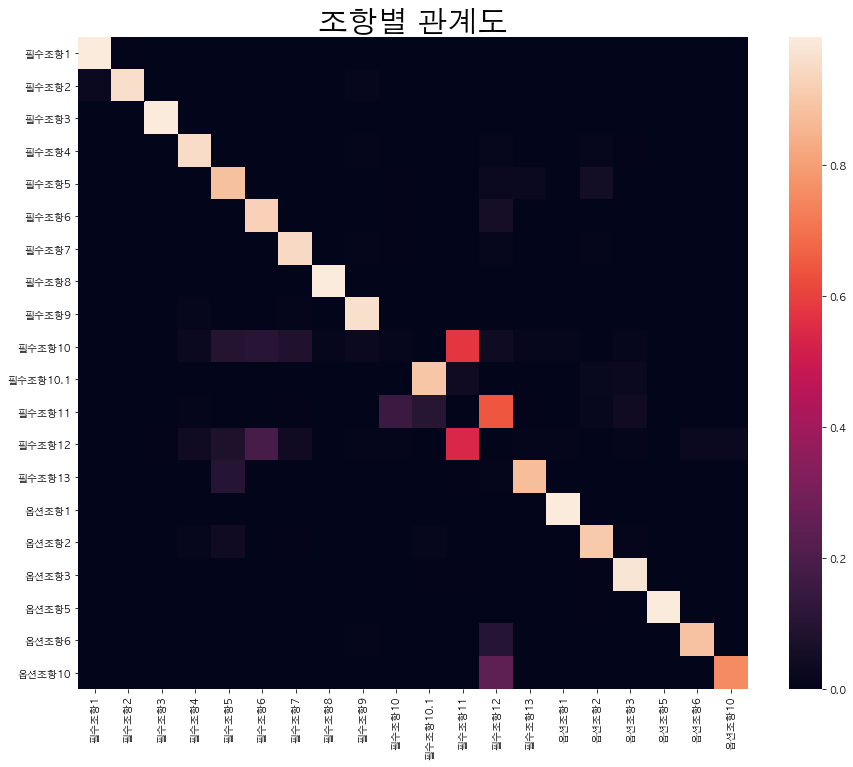

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15, 12))
sns.heatmap(prob_matrix)

plt.title('조항별 관계도', fontsize=30)

plt.show()

In [47]:
matrix_df.to_csv('./result/multi_label_distribution.csv')
prob_matrix.to_csv('./result/probability_matrix.csv')